In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\lohik\AI-agriculture-yield-production\Datasets\Crops_data.csv')

In [5]:
df.head(3)

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,2010,14,Chhattisgarh,Durg,777.92,1319.18,1695.77,46.12,45.87,...,256.96,0.00,0.00,0.00,2.00,32.29,34.30,0.11,0.49,0.15
1,1,2011,14,Chhattisgarh,Durg,806.55,1416.48,1756.23,44.98,50.19,...,506.02,0.08,0.02,250.00,0.00,0.00,0.00,0.12,0.54,0.00
2,1,2012,14,Chhattisgarh,Durg,807.07,1534.22,1900.97,43.87,47.69,...,252.98,0.13,0.02,153.85,1.99,33.70,35.69,0.12,0.54,1.32


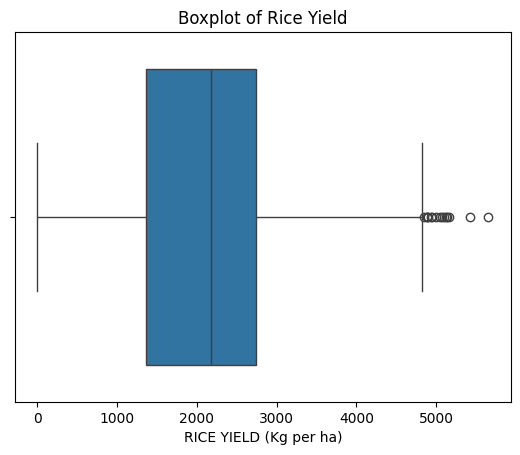

In [6]:
sns.boxplot(x=df['RICE YIELD (Kg per ha)'])
plt.title("Boxplot of Rice Yield")
plt.show()

In [7]:
q1 = df['RICE YIELD (Kg per ha)'].quantile(0.25)
q3 = df['RICE YIELD (Kg per ha)'].quantile(0.75)
IQR = q3-q1
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)
new_df = df[(df['RICE YIELD (Kg per ha)']<=max_range) & (df['RICE YIELD (Kg per ha)']>min_range)]

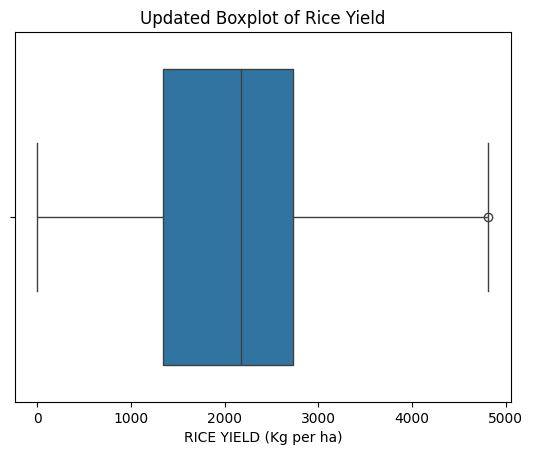

In [8]:
sns.boxplot(x=new_df['RICE YIELD (Kg per ha)'])
plt.title("Updated Boxplot of Rice Yield")
plt.show()

In [9]:
new_df.to_csv(r'C:\Users\lohik\AI-agriculture-yield-production\Datasets\rice_data_outlier_removed.csv', index=False)

In [10]:
print("Shape:", new_df.shape)
print("Columns:", new_df.columns)

Shape: (2469, 80)
Columns: Index(['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name',
       'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)',
       'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)',
       'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)',
       'KHARIF SORGHUM AREA (1000 ha)',
       'KHARIF SORGHUM PRODUCTION (1000 tons)',
       'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)',
       'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)',
       'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)',
       'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)',
       'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)',
       'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)',
       'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)',
       'FINGER MILLET PRODUCTION (1000 tons)',
       'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)',
       'BARLEY PRODUC

In [ ]:
df_clean = new_df.copy()
important_cols = [
    'RICE AREA (1000 ha)',
    'RICE PRODUCTION (1000 tons)',
    'RICE YIELD (Kg per ha)'
]

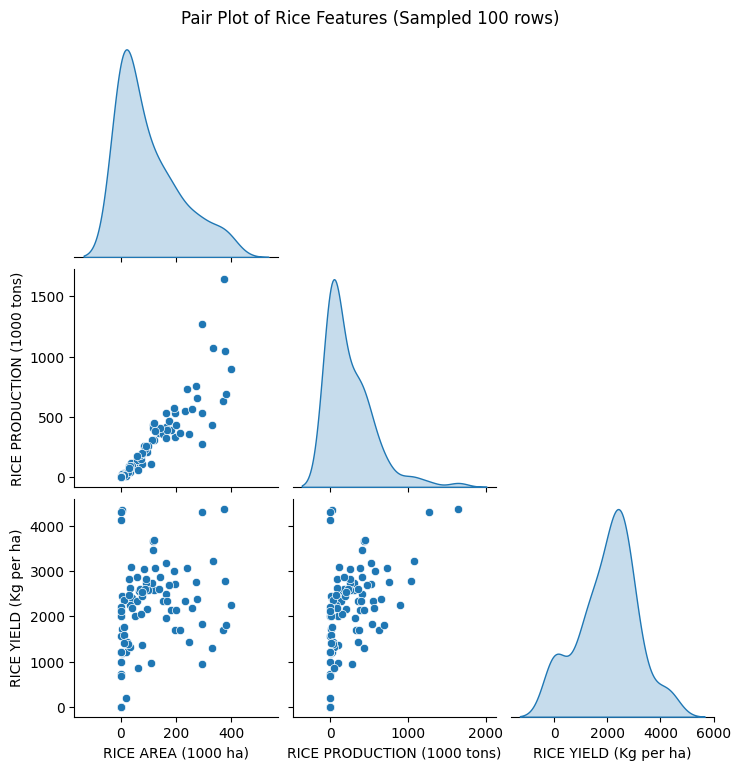

In [12]:
# Sample 100 rows only
sample_df = df_clean[important_cols].sample(n=100, random_state=42)

sns.pairplot(sample_df, diag_kind="kde", corner=True)
plt.suptitle("Pair Plot of Rice Features (Sampled 100 rows)", y=1.02)
plt.show()


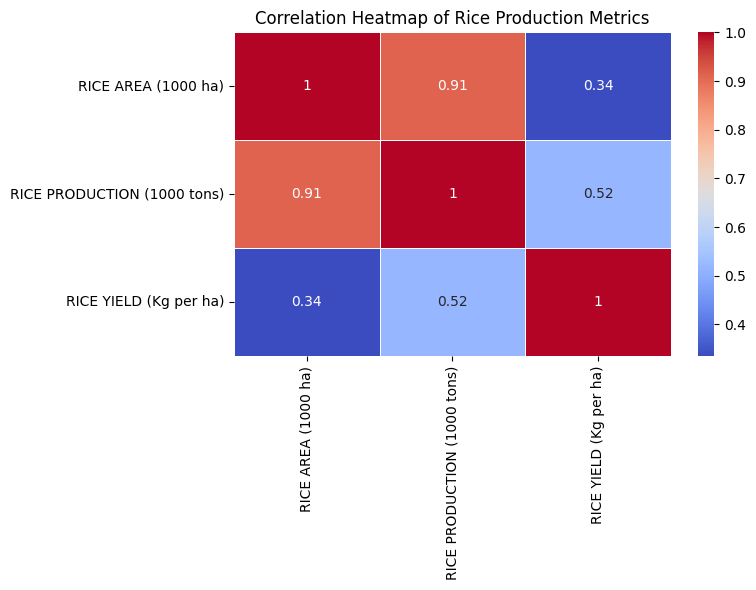

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean[important_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Rice Production Metrics")
plt.tight_layout()
plt.show()